In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化前数据集合.xlsx')
label1 = np.array(features['循环应力'])
features = features.drop(['循环应力', '失效反向数'], axis=1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=50, gamma=1,epsilon=0.1)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_svr, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


10折交叉验证平均R2值: 0.79
10折交叉验证平均MAPE值: 13.54


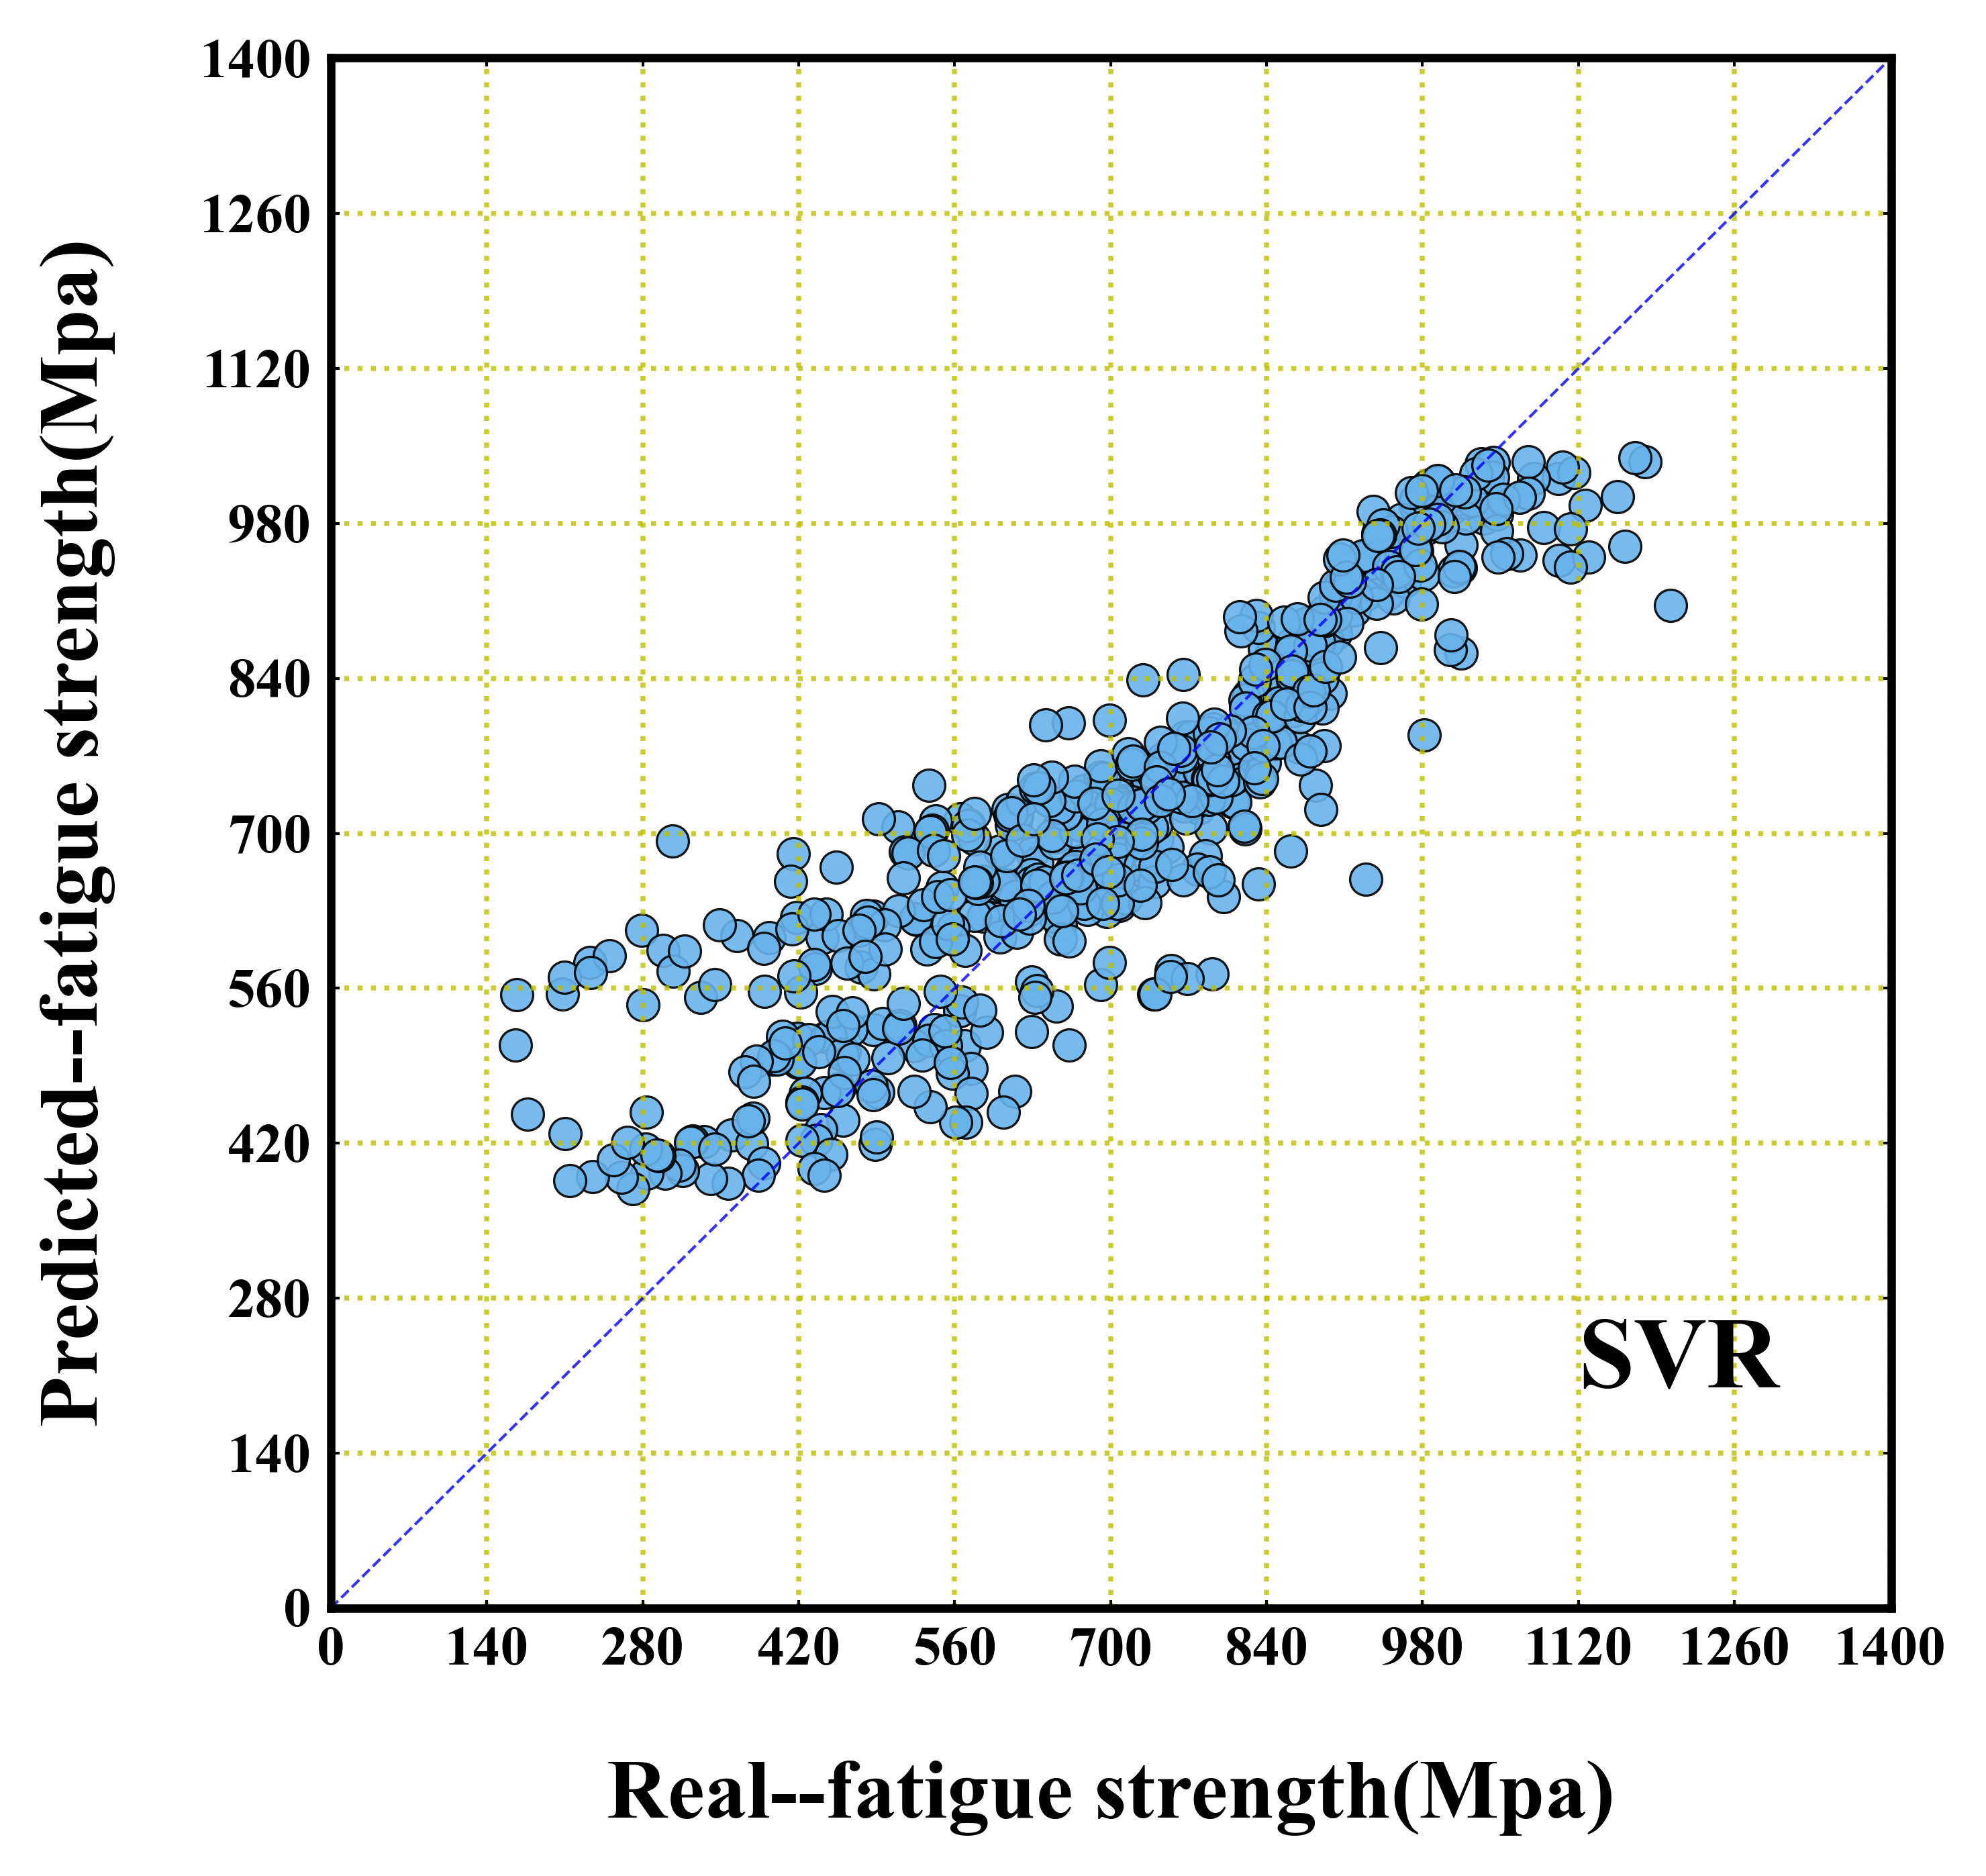

In [5]:
# 设置绘图参数
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

new_ticks = list(np.arange(0, 1401, 140))
plt.xticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
# 绘制散点图
plt.scatter( data_y4, y_cv2_svr, alpha=0.9, s=33, linewidths=0.4, c='#68B3EC',
            edgecolor='#000000', marker='o')
plt.plot([0, 1401], [0, 1401], 'b--', linewidth='0.5', alpha=0.8)
plt.ylim(0, 1401)
plt.xlim(0, 1401)

# 显示绘图
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.xlabel('Real--fatigue strength(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.ylabel('Predicted--fatigue strength(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.text(1120, 200, 'SVR', fontsize=18,weight='bold',fontname='Times New Roman')  # 在图中添加文字
plt.show()

10折交叉验证平均R2值: 0.79
10折交叉验证平均MAPE值: 13.81


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: User

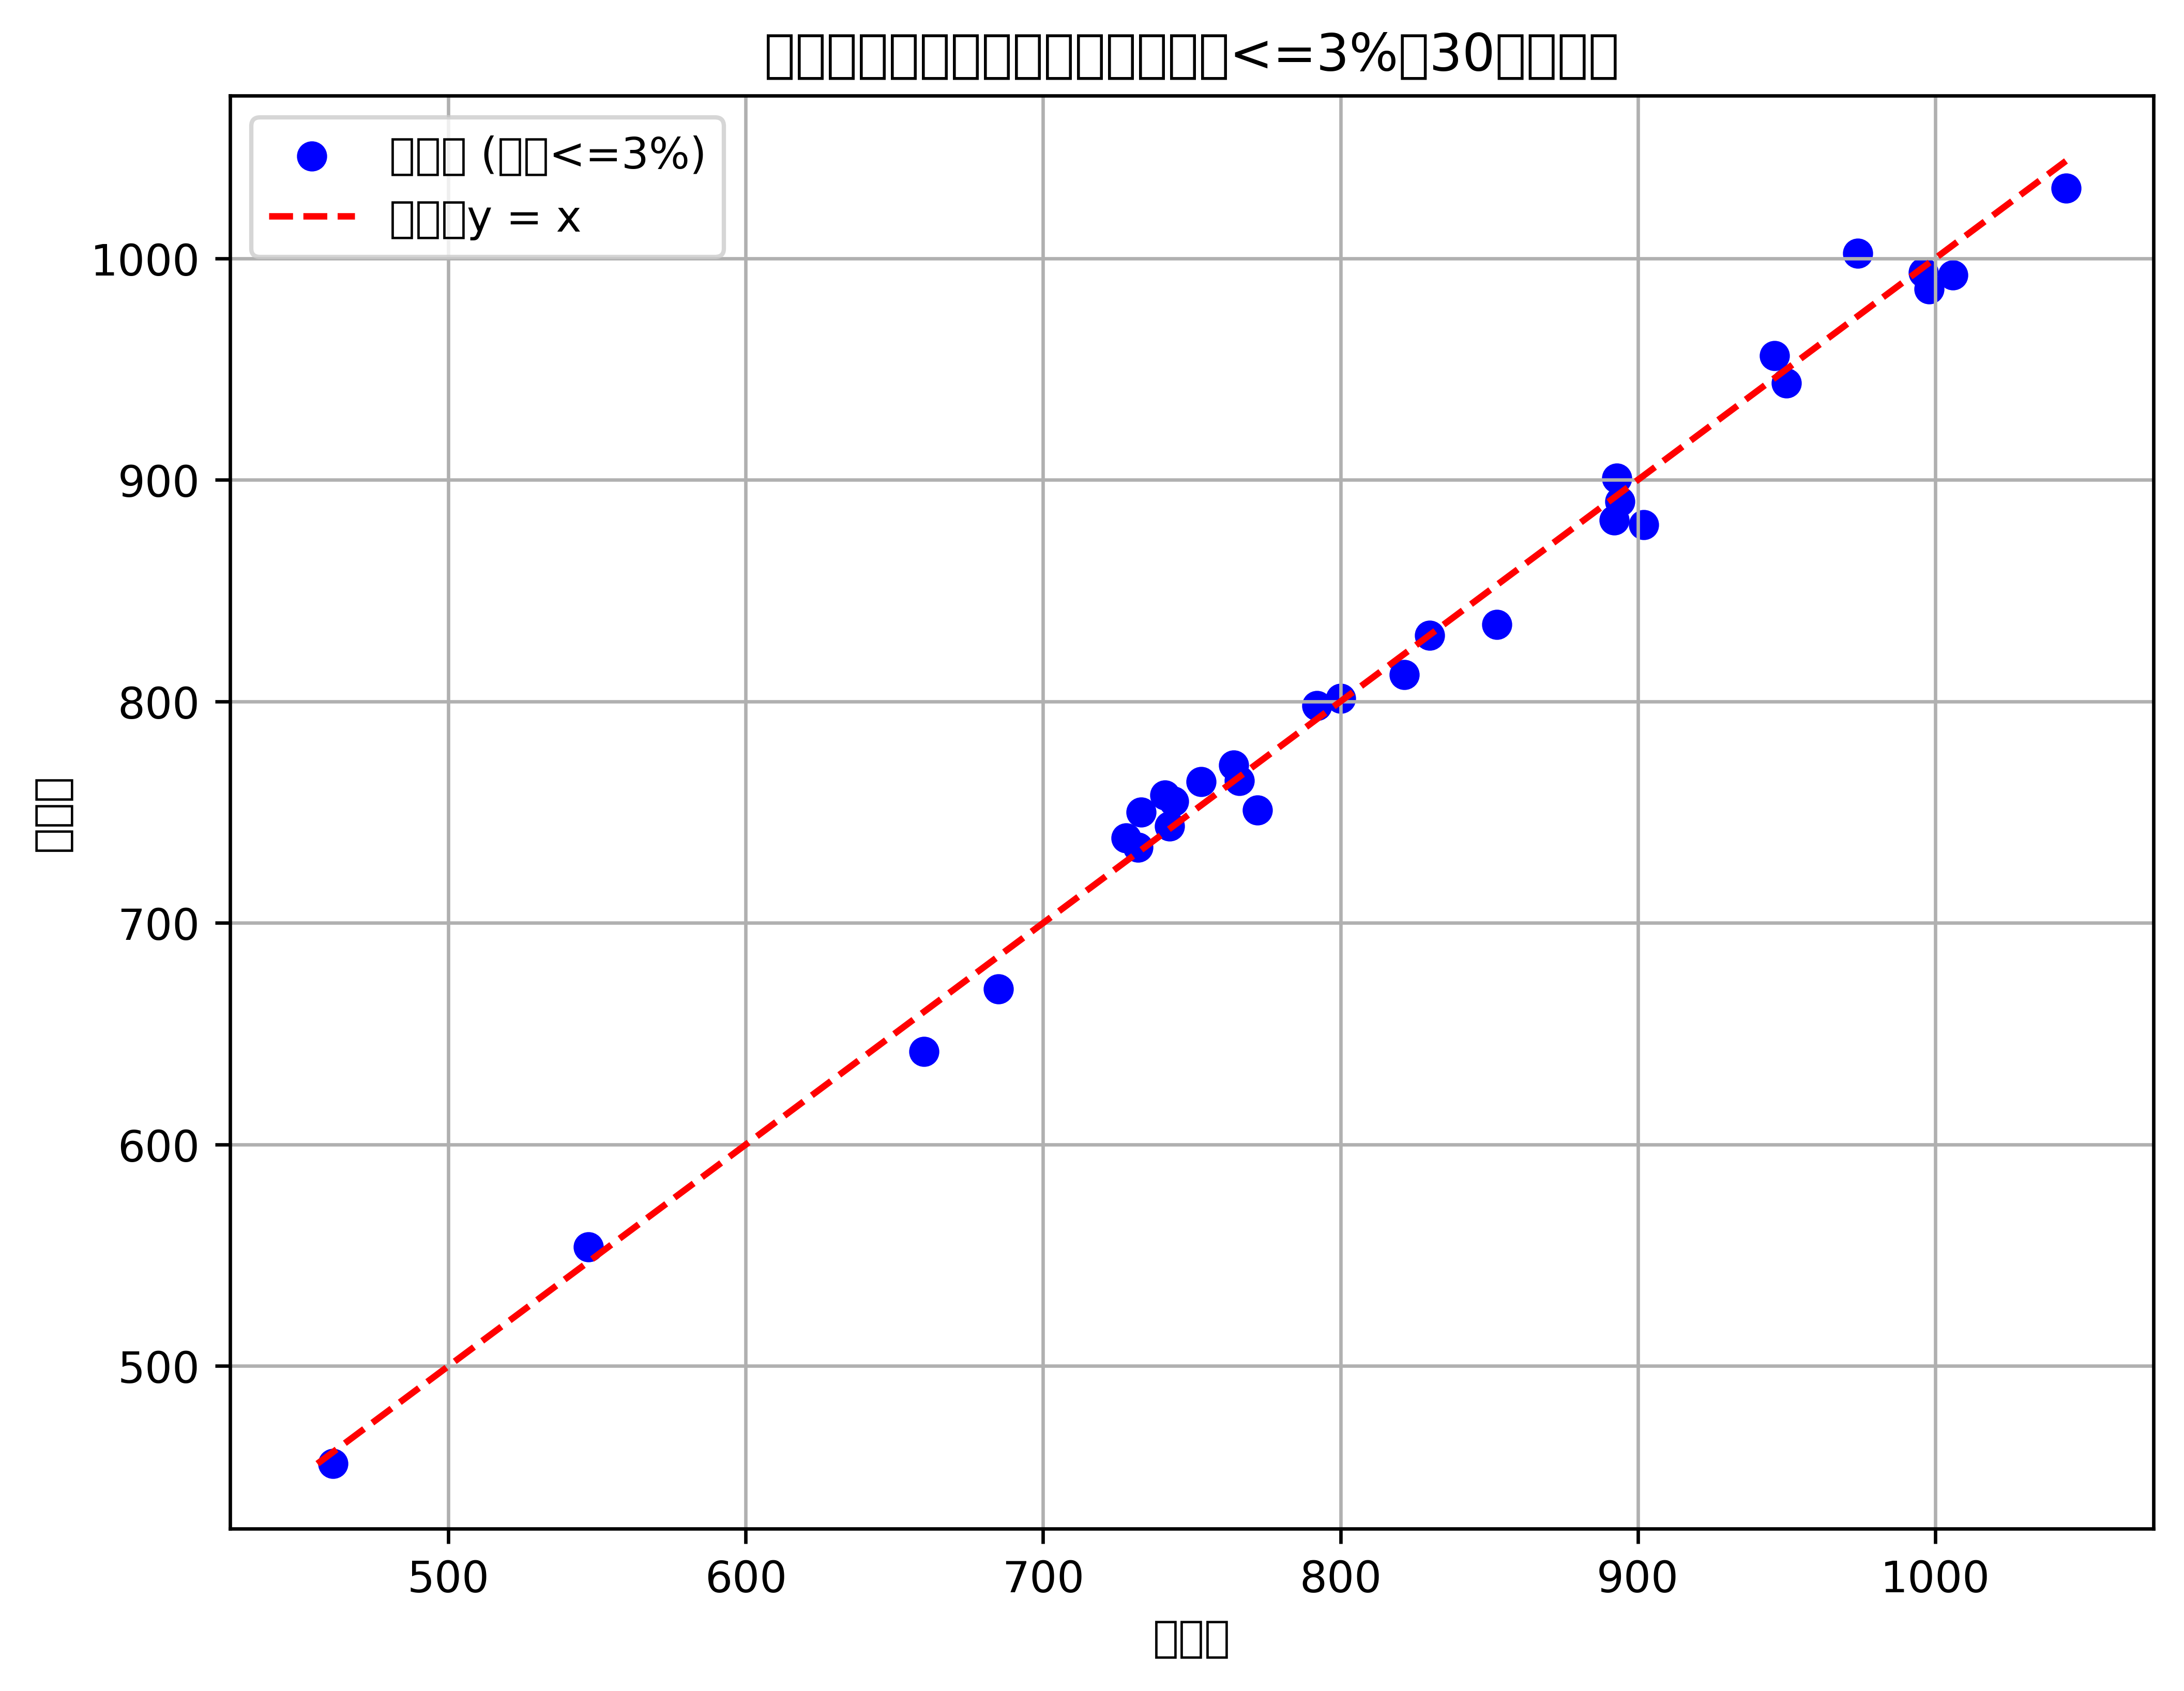

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化前数据集合.xlsx')
label1 = np.array(features['循环应力'])
features = features.drop(['循环应力', '失效反向数'], axis=1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=50, gamma=1, epsilon=0.1)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_svr, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

# ----------------------------
# 以下代码实现随机选取30组真实值与预测值之间误差在3%以内的样本对比，并画出散点图

# 计算每个样本的相对误差（百分比形式）
relative_errors = np.abs(data_y4 - y_cv2_svr) / np.abs(data_y4)

# 筛选出误差在3%以内的样本索引
indices_within_3 = np.where(relative_errors <= 0.03)[0]

if len(indices_within_3) < 30:
    print(f"误差在3%以内的样本数量不足30个，仅有 {len(indices_within_3)} 个样本。")
    selected_indices = indices_within_3
else:
    # 随机选取30个样本（不重复）
    selected_indices = np.random.choice(indices_within_3, size=30, replace=False)

# 获取对应的真实值和预测值
actual_selected = data_y4[selected_indices]
predicted_selected = y_cv2_svr[selected_indices]

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(actual_selected, predicted_selected, color='blue', label='样本点 (误差<=3%)')

# 绘制理想的 y = x 参考线
min_val = min(np.min(actual_selected), np.min(predicted_selected))
max_val = max(np.max(actual_selected), np.max(predicted_selected))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='理想：y = x')

plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('真实值与预测值对比散点图（误差<=3%的30个样本）')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(actual_selected, predicted_selected, color='blue', label='样本点 (误差<=3%)')

# 绘制理想的 y = x 参考线
min_val = min(np.min(actual_selected), np.min(predicted_selected))
max_val = max(np.max(actual_selected), np.max(predicted_selected))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='理想：y = x')

plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('真实值与预测值对比散点图（误差<=3%的30个样本）')
plt.legend()
plt.grid(True)
plt.show()

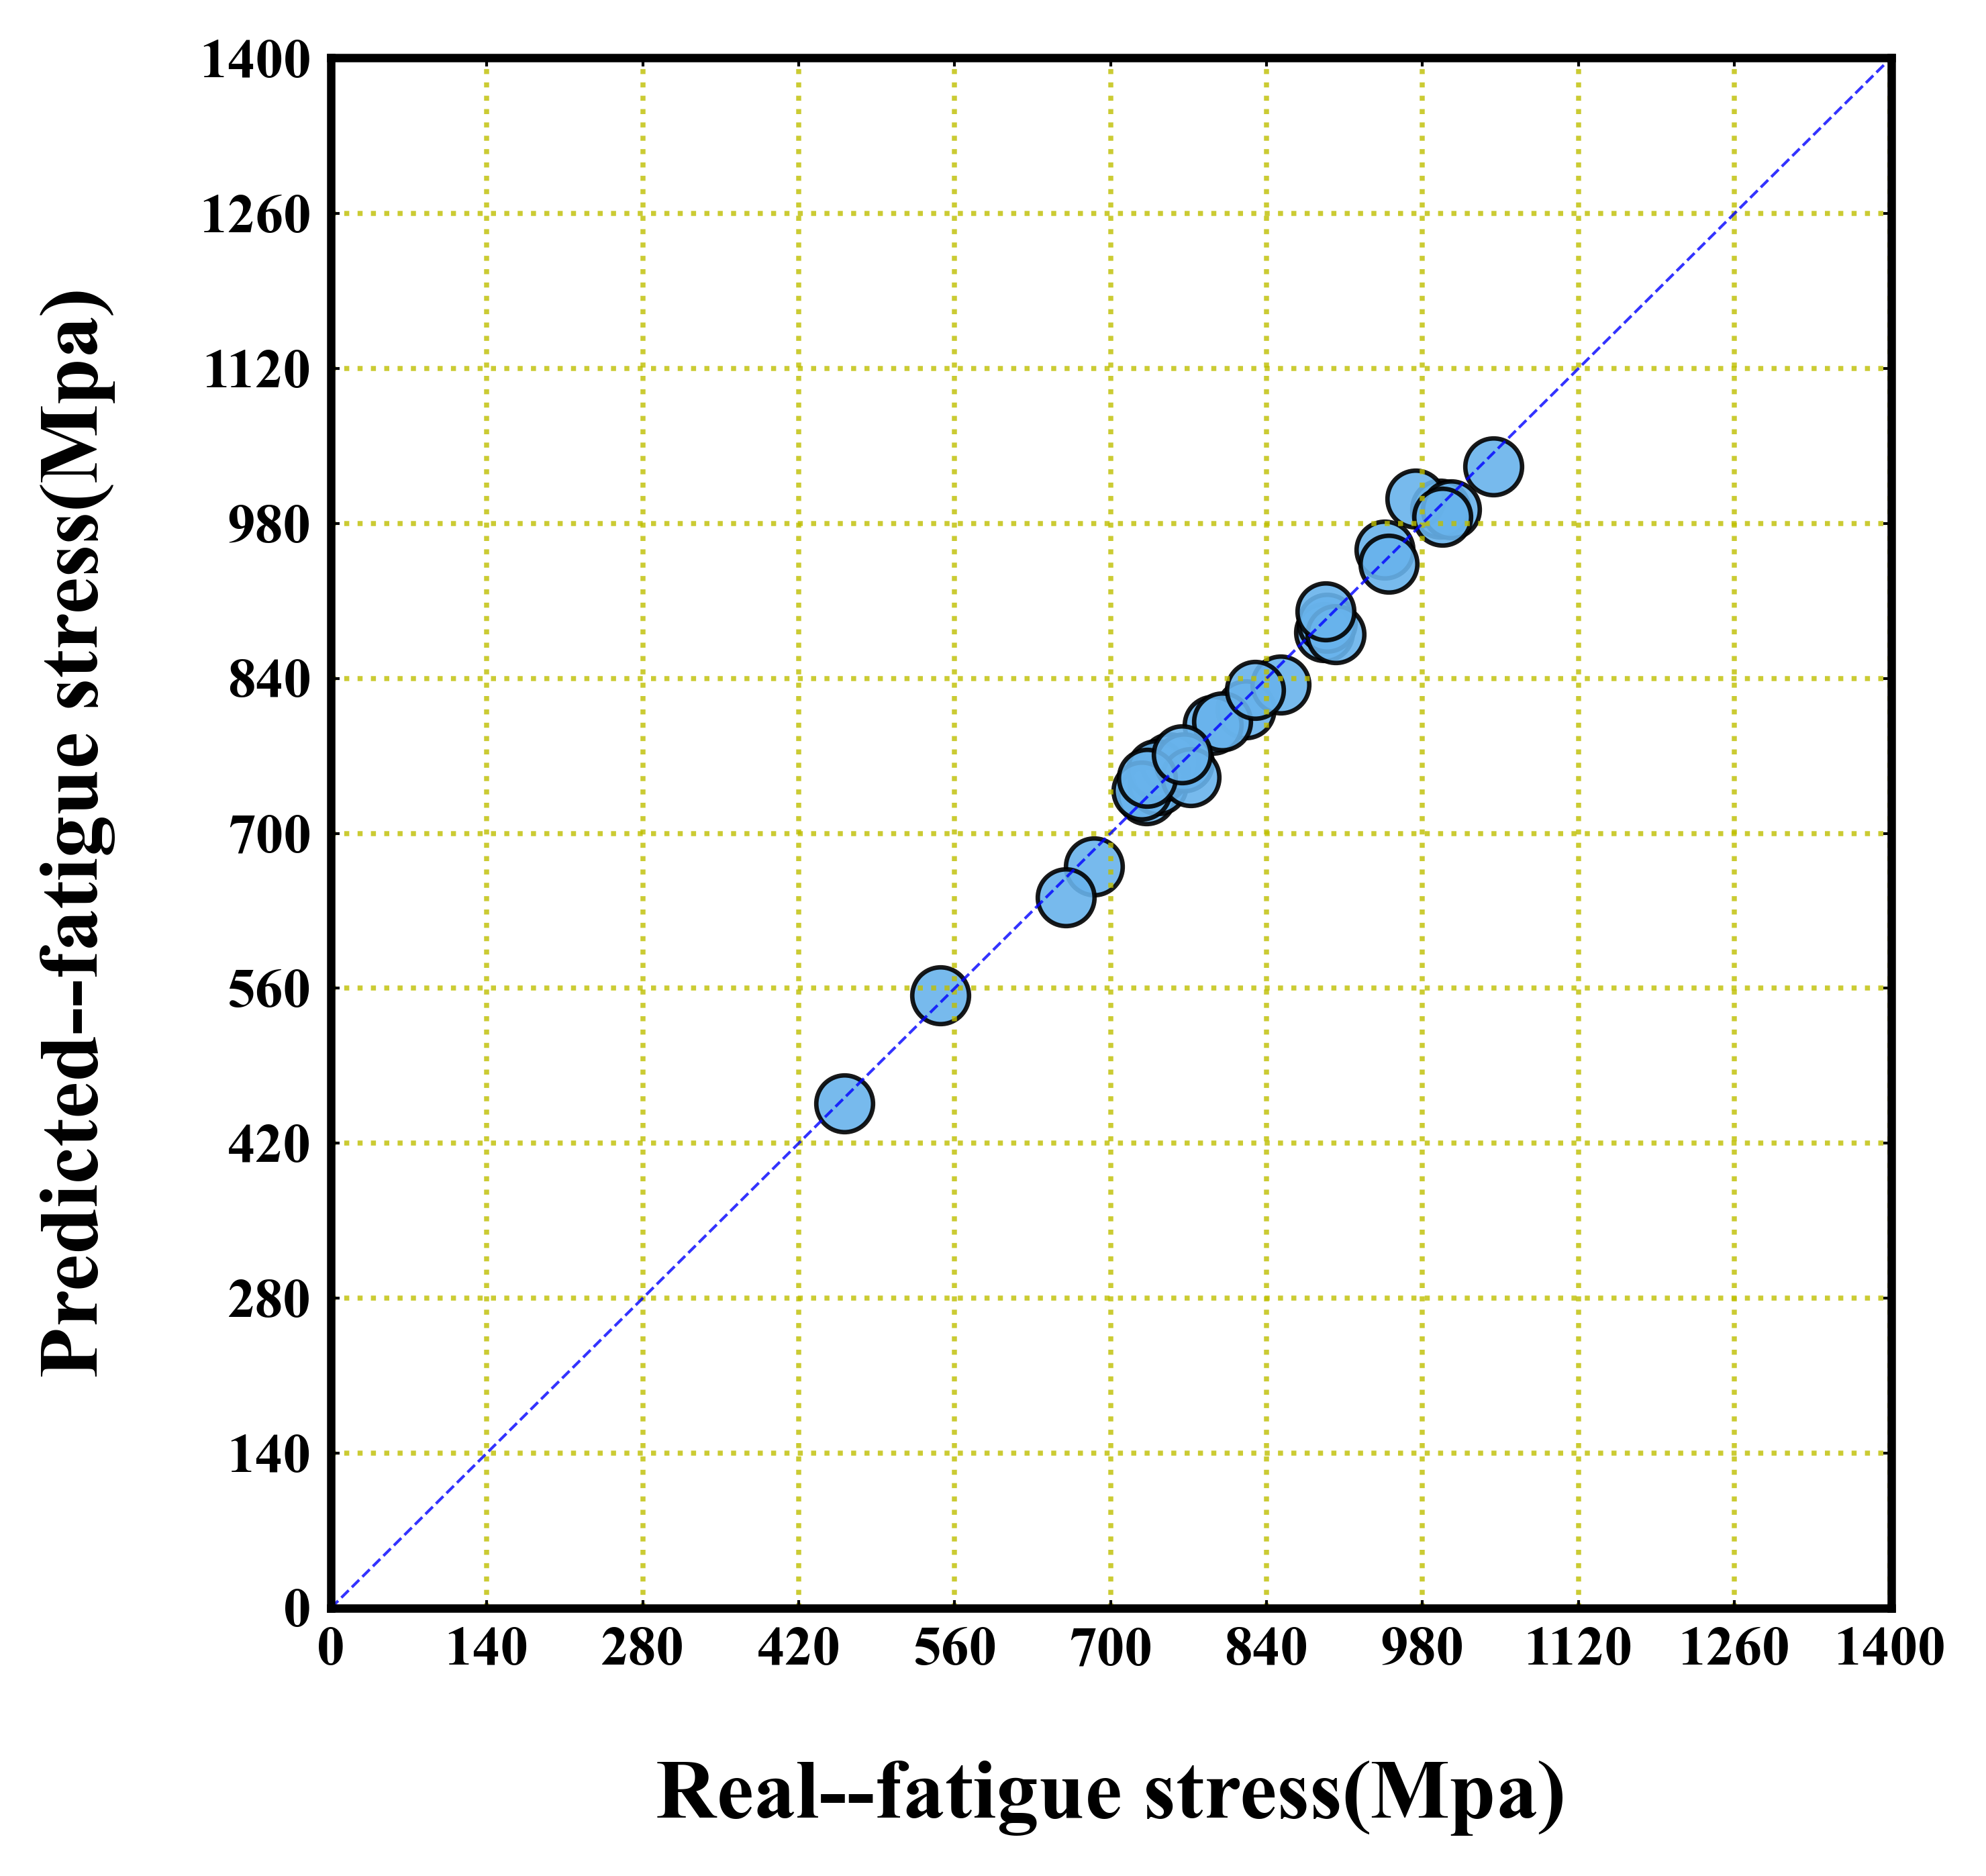

In [15]:
# 设置绘图参数
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

new_ticks = list(np.arange(0, 1401, 140))
plt.xticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
# 绘制散点图
plt.scatter( actual_selected, predicted_selected, alpha=0.9, s=103, linewidths=0.8, c='#68B3EC',
            edgecolor='#000000', marker='o')
plt.plot([0, 1401], [0, 1401], 'b--', linewidth='0.5', alpha=0.8)
plt.ylim(0, 1401)
plt.xlim(0, 1401)

# 显示绘图
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.xlabel('Real--fatigue stress(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.ylabel('Predicted--fatigue stress(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
#plt.text(1120, 200, fontsize=18,weight='bold',fontname='Times New Roman')  # 在图中添加文字
plt.show()

10折交叉验证平均R2值: 0.79
选取的10组样本（索引、真实值、预测值、相对误差%）：
索引 105: 真实值=830.000, 预测值=829.885, 相对误差=0.01%
索引 45: 真实值=827.000, 预测值=822.940, 相对误差=0.49%
索引 206: 真实值=766.000, 预测值=756.762, 相对误差=1.21%
索引 240: 真实值=802.000, 预测值=785.265, 相对误差=2.09%
索引 409: 真实值=737.300, 预测值=759.133, 相对误差=2.96%
索引 504: 真实值=700.400, 预测值=728.432, 相对误差=4.00%
索引 298: 真实值=443.000, 预测值=465.006, 相对误差=4.97%
索引 253: 真实值=693.910, 预测值=650.368, 相对误差=6.27%
索引 6: 真实值=810.000, 预测值=747.391, 相对误差=7.73%
索引 488: 真实值=727.000, 预测值=654.439, 相对误差=9.98%


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: User

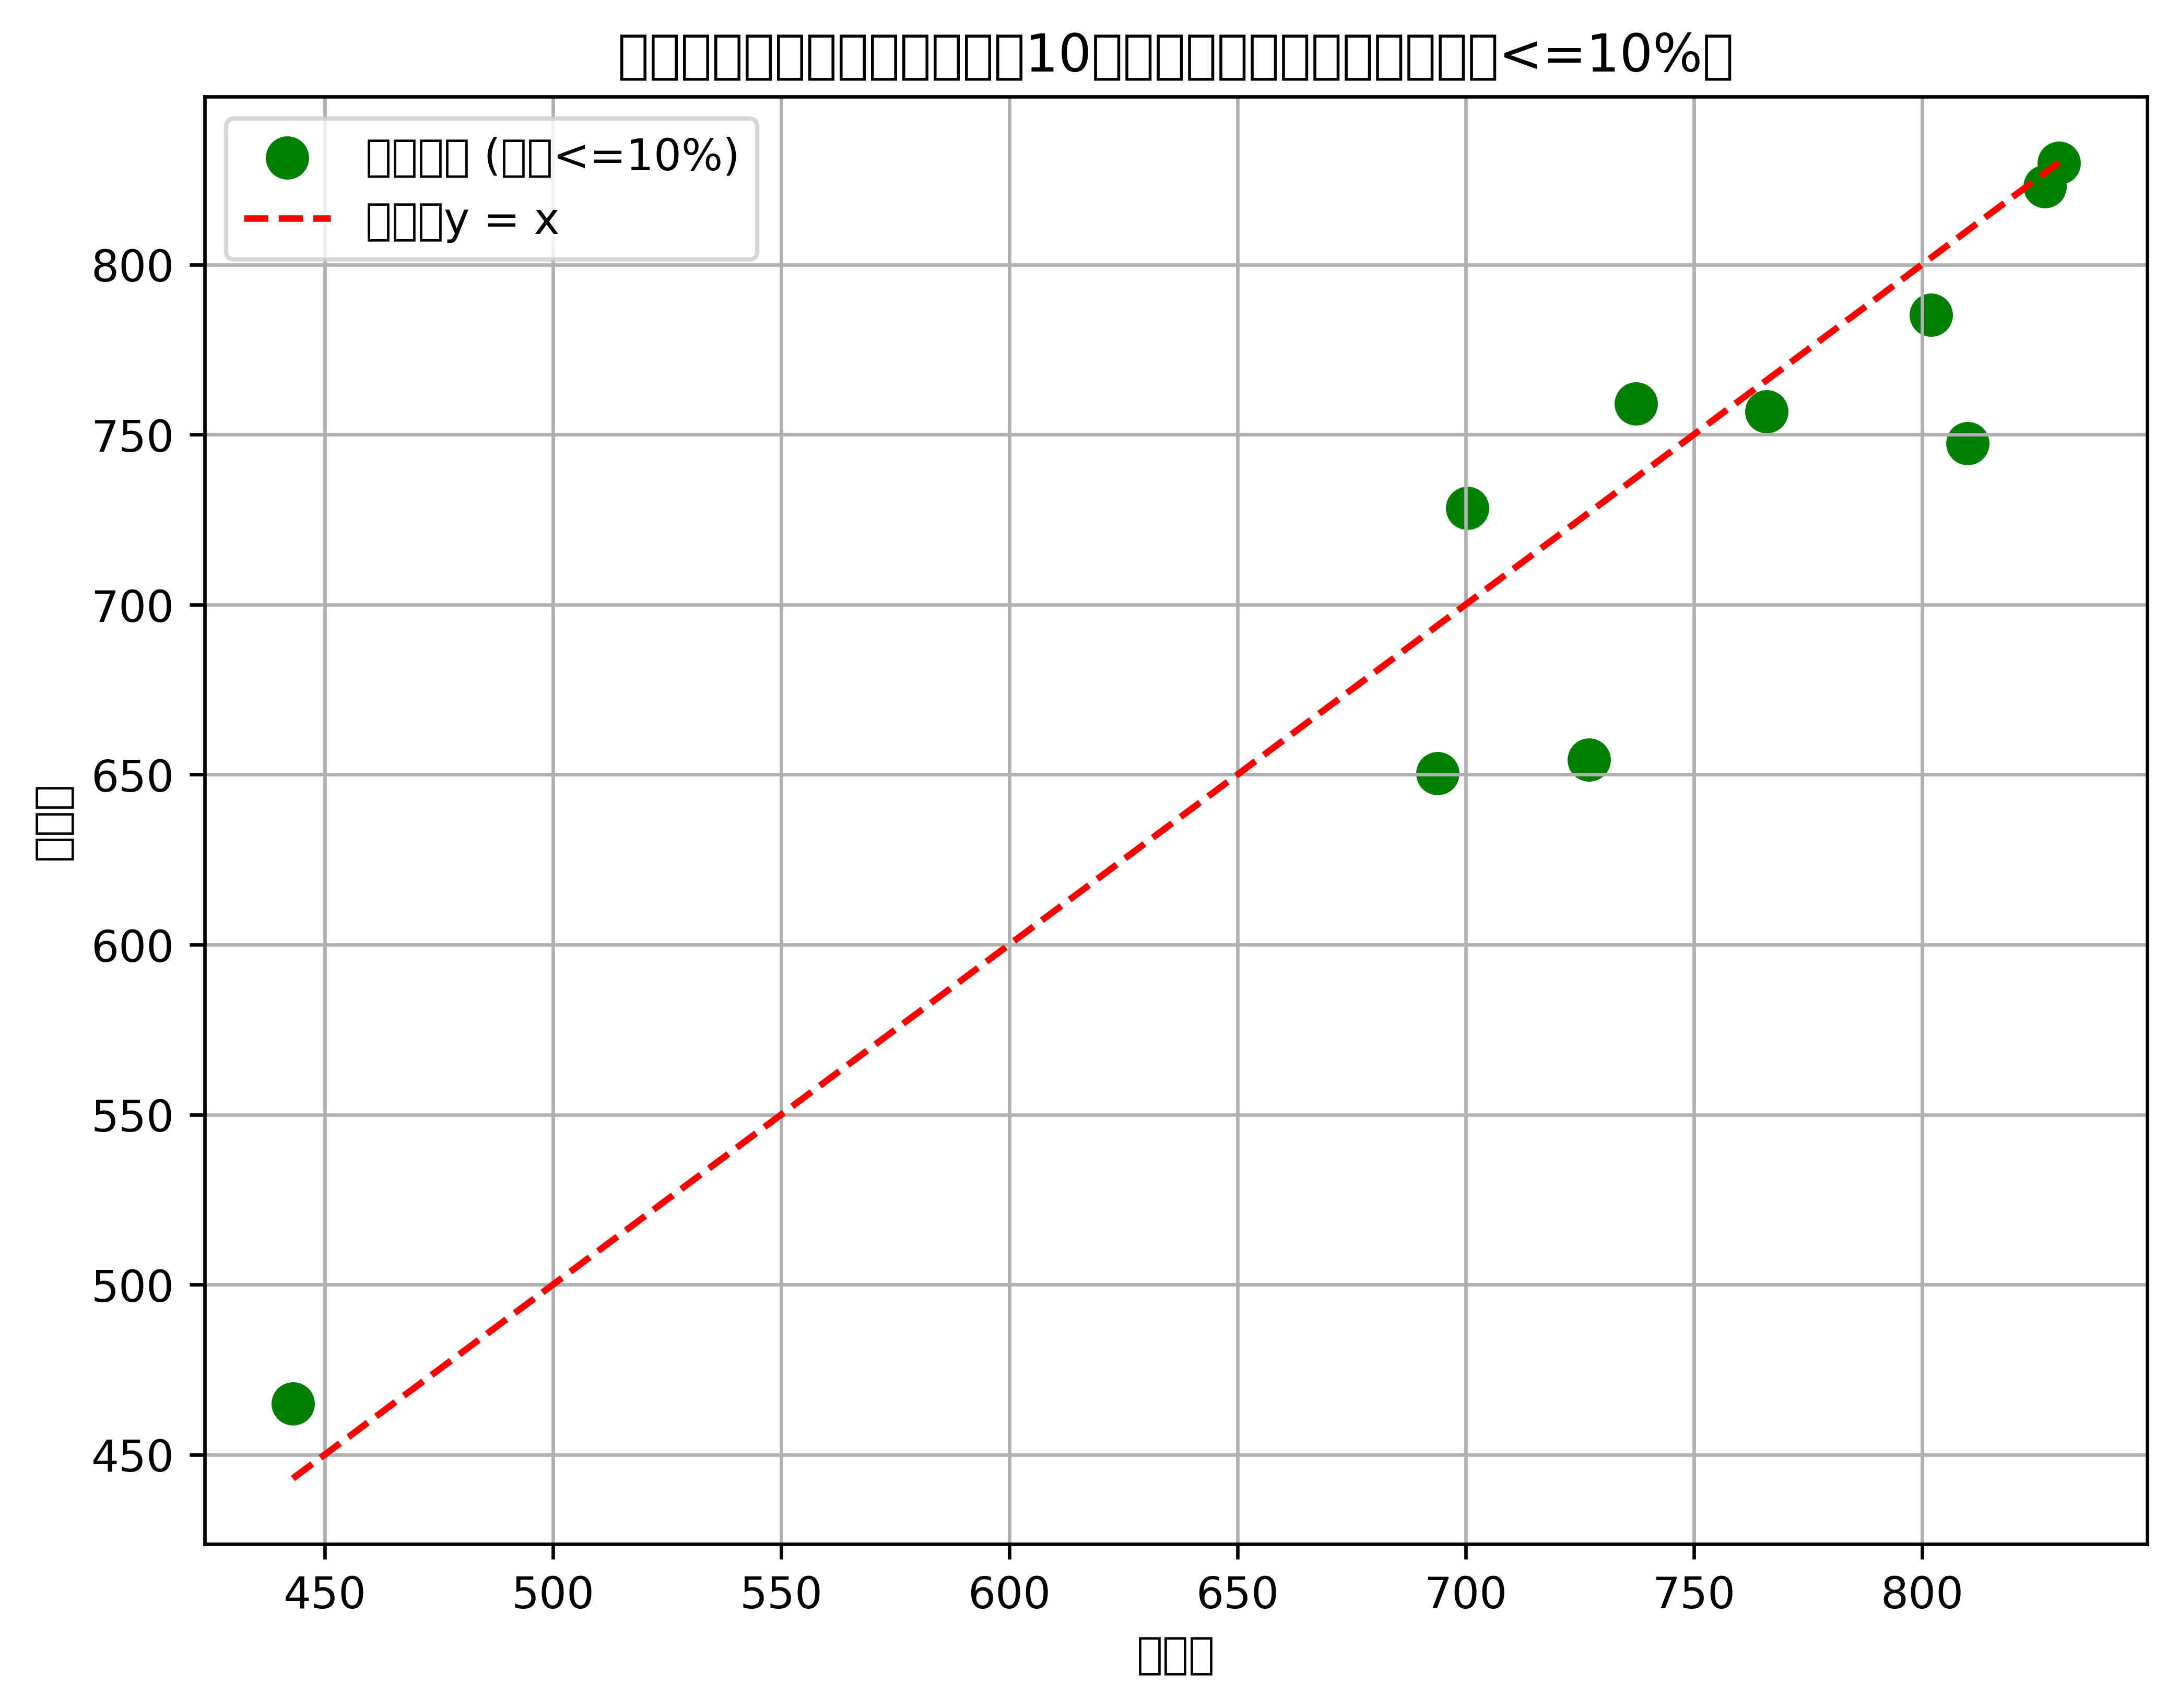

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score

# ---------------------------
# 数据读取与预处理

# 读取数据
features = pd.read_excel('优化前数据集合.xlsx')
label1 = np.array(features['循环应力'])
features = features.drop(['循环应力', '失效反向数'], axis=1)

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=50, gamma=1, epsilon=0.1)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# ---------------------------
# 根据预测结果计算相对误差并筛选出误差在10%以内的样本

# 计算相对误差：绝对误差除以真实值（注意真实值可能为0的情况，这里假设真实值均非零）
relative_errors = np.abs(data_y4 - y_cv2_svr) / np.abs(data_y4)

# 筛选出误差在10%以内的样本（误差<=0.10）
indices_within_10 = np.where(relative_errors <= 0.10)[0]

if len(indices_within_10) < 10:
    print(f"误差在10%以内的样本数量不足10个，仅有 {len(indices_within_10)} 个样本。")
    selected_indices_10 = indices_within_10
else:
    # 为了使选择的样本误差分布均匀，先根据相对误差从小到大排序
    sorted_indices = indices_within_10[np.argsort(relative_errors[indices_within_10])]
    num_valid = len(sorted_indices)
    # 计算均匀分布的下标位置（选取10个样本，起始和末尾包含在内）
    positions = np.linspace(0, num_valid - 1, 10, dtype=int)
    selected_indices_10 = sorted_indices[positions]

# 获取对应的真实值和预测值
actual_selected = data_y4[selected_indices_10]
predicted_selected = y_cv2_svr[selected_indices_10]
selected_errors_percent = relative_errors[selected_indices_10] * 100

# 输出选择样本的详细信息
print("选取的10组样本（索引、真实值、预测值、相对误差%）：")
for idx, actual, pred, err in zip(selected_indices_10, actual_selected, predicted_selected, selected_errors_percent):
    print(f"索引 {idx}: 真实值={actual:.3f}, 预测值={pred:.3f}, 相对误差={err:.2f}%")

# ---------------------------
# 绘制散点图

plt.figure(figsize=(8, 6))
plt.scatter(actual_selected, predicted_selected, color='green', s=80, label='选取样本 (误差<=10%)')

# 绘制理想的 y=x 参考线
min_val = min(np.min(actual_selected), np.min(predicted_selected))
max_val = max(np.max(actual_selected), np.max(predicted_selected))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='理想：y = x')

plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('真实值与预测值对比散点图（10组误差均匀分布的样本，误差<=10%）')
plt.legend()
plt.grid(True)
plt.show()

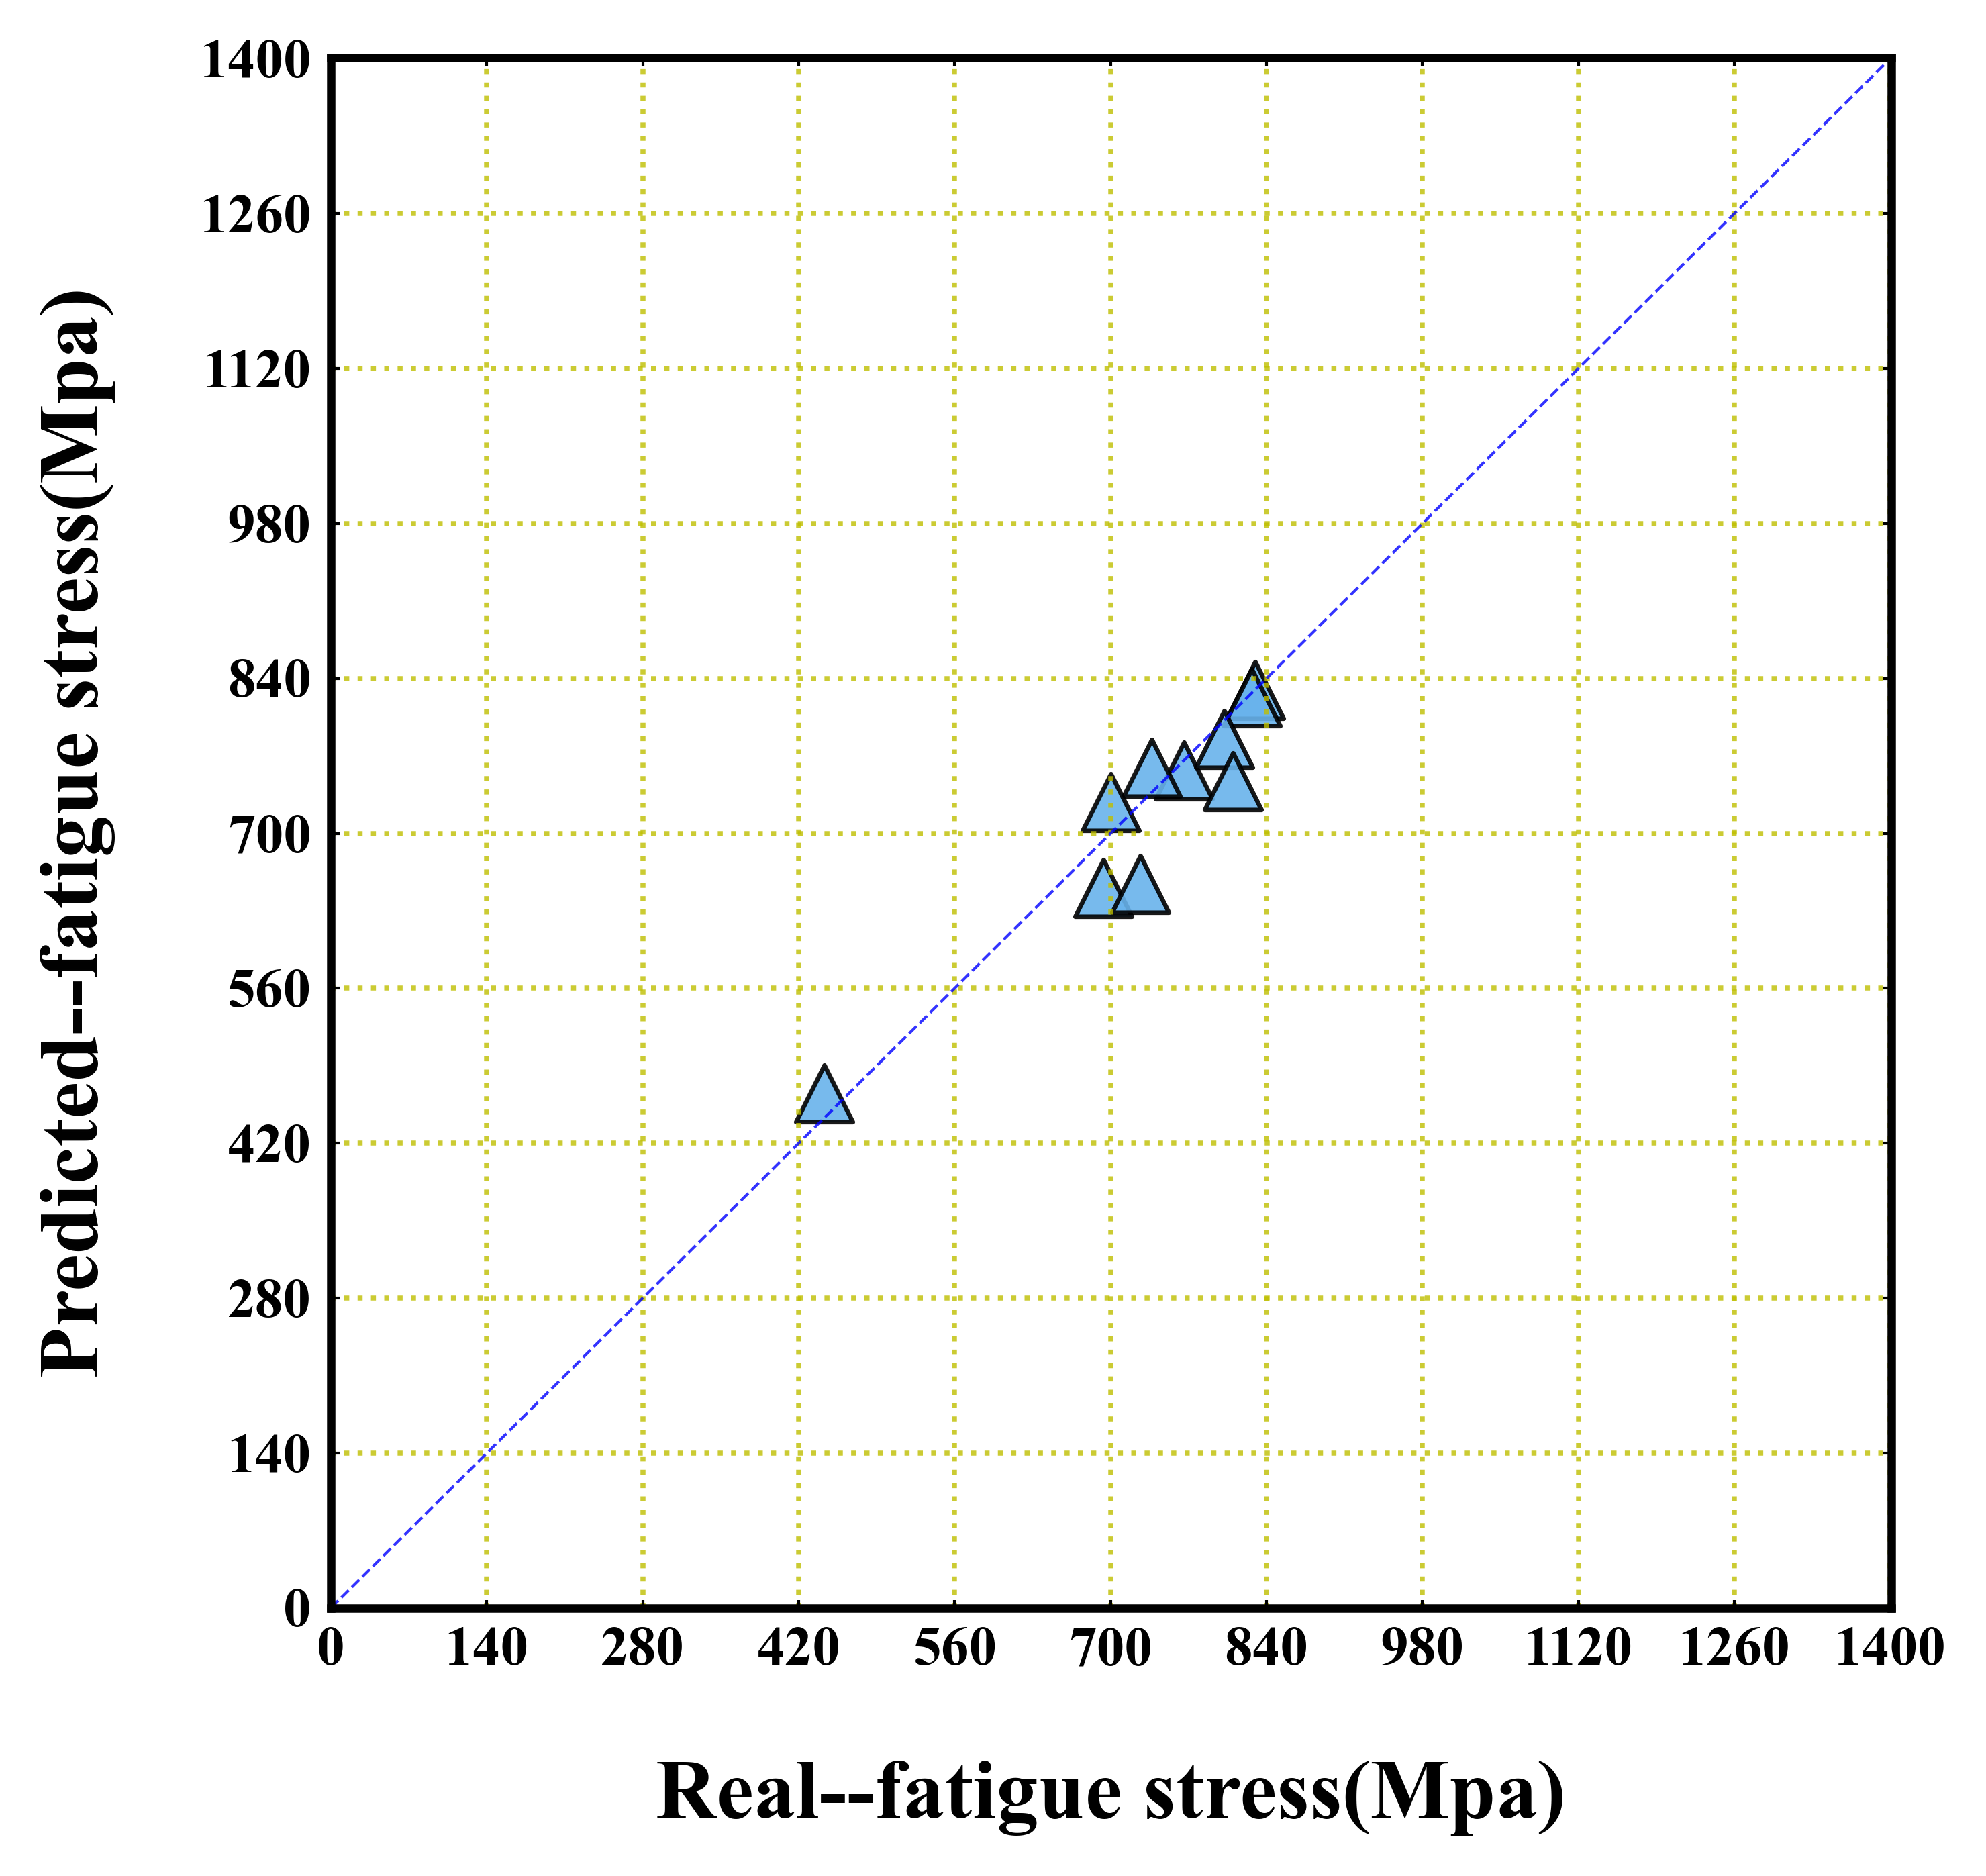

In [18]:
# 设置绘图参数
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

new_ticks = list(np.arange(0, 1401, 140))
plt.xticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
# 绘制散点图
plt.scatter( actual_selected, predicted_selected, alpha=0.9, s=103, linewidths=0.8, c='#68B3EC',
            edgecolor='#000000', marker='^')
plt.plot([0, 1401], [0, 1401], 'b--', linewidth='0.5', alpha=0.8)
plt.ylim(0, 1401)
plt.xlim(0, 1401)

# 显示绘图
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.xlabel('Real--fatigue stress(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.ylabel('Predicted--fatigue stress(Mpa)', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
#plt.text(1120, 200, fontsize=18,weight='bold',fontname='Times New Roman')  # 在图中添加文字
plt.show()